In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
df=pd.read_csv('nba_games.csv')
df

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,...,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,...,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,2,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,...,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,3,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,...,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True
4,4,240.0,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,...,16.8,30.9,157.0,90.0,MEM,92,1,2021,2021-04-30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,17767,240.0,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,...,34.2,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True
17768,17768,240.0,240.0,37.0,74.0,0.500,13.0,25.0,0.520,26.0,...,25.0,30.0,139.0,129.0,ORL,108,1,2017,2016-12-14,True
17769,17769,240.0,240.0,42.0,89.0,0.472,14.0,33.0,0.424,10.0,...,25.6,29.9,175.0,126.0,LAC,113,0,2017,2016-12-14,False
17770,17770,240.0,240.0,41.0,85.0,0.482,9.0,26.0,0.346,26.0,...,27.7,27.1,150.0,126.0,MIA,106,1,2020,2020-09-19,True


In [3]:
df['season'].max()

2022

In [4]:
df['season'].min()

2016

In [5]:
df.isnull().sum()

Unnamed: 0    0
mp            0
mp.1          0
fg            0
fga           0
             ..
total_opp     0
home_opp      0
season        0
date          0
won           0
Length: 151, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17772 entries, 0 to 17771
Columns: 151 entries, Unnamed: 0 to won
dtypes: bool(1), float64(140), int64(7), object(3)
memory usage: 20.4+ MB


In [7]:
pd.set_option('display.max_columns', None)
print(df)

       Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0               0  240.0  240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0   
1               1  240.0  240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0   
2               2  240.0  240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0   
3               3  240.0  240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0   
4               4  240.0  240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0   
...           ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
17767       17767  240.0  240.0  35.0   81.0  0.432  11.0  26.0  0.423  27.0   
17768       17768  240.0  240.0  37.0   74.0  0.500  13.0  25.0  0.520  26.0   
17769       17769  240.0  240.0  42.0   89.0  0.472  14.0  33.0  0.424  10.0   
17770       17770  240.0  240.0  41.0   85.0  0.482   9.0  26.0  0.346  26.0   
17771       17771  240.0  240.0  33.0   85.0  0.388  12.0  44.0  0.273  28.0   

        fta    ft%   orb   drb   trb   

In [8]:
df.isnull()


,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,Fals

In [9]:
df.sort_values('date')

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
16086,16086,240.0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,NaN,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,9.0,4.5,15.9,100.0,94.9,110.9,NaN,NaN,7.0,20.0,1.000,2.0,7.0,0.667,10.0,15.0,1.0,3.0,5.0,6.0,9.0,3.0,3.0,5.0,5.0,18.0,5.0,1.000,1.000,1.000,0.750,19.8,26.3,13.6,43.4,5.3,6.3,37.5,38.9,201.0,120.0,NOP,95,0,1,240.0,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0,NaN,0.525,0.474,0.313,0.229,45.7,81.4,62.9,70.7,8.0,10.8,15.9,100.0,110.9,94.9,NaN,NaN,14.0,26.0,1.000,5.0,12.0,1.000,7.0,7.0,1.0,5.0,5.0,9.0,7.0,2.0,2.0,7.0,5.0,40.0,20.0,1.136,1.000,0.462,0.571,39.0,27.2,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False
16904,16904,240.0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,NaN,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,NaN,NaN,12.0,22.0,0.571,3.0,7.0,0.500,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,CLE,95,0,1,240.0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,NaN,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,NaN,NaN,8.0,22.0,0.750,3.0,5.0,0.750,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False
16905,16905,240.0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,NaN,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,NaN,NaN,8.0,22.0,0.750,3.0,5.0,0.750,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,CHI,97,1,0,240.0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,NaN,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,NaN,NaN,12.0,22.0,0.571,3.0,7.0,0.500,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True
16087,16087,240.0,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0,NaN,0.525,0.474,0.313,0.229,45.7,81.4,62.9,70.7,8.0,10.8,15.9,100.0,110.9,94.9,NaN,NaN,14.0,26.0,1.000,5.0,12.0,1.000,7.0,7.0,1.0,5.0,5.0,9.0,7.0,2.0,2.0,7.0,5.0,40.0,20.0,1.136,1.000,0.462,0.571,39.0,27.2,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,GSW,111,1,0,240.0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,NaN,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,

In [10]:
df=df.reset_index(drop=True)
df

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,NaN,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,NaN,NaN,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,NaN,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,NaN,NaN,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,NaN,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,NaN,NaN,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,NaN,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,NaN,NaN,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,2,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,NaN,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,NaN,NaN,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,1,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,NaN,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,NaN,NaN,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,3,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,NaN,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,NaN,NaN,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,0,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,NaN,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113

In [11]:
del df['mp.1']
del df['mp_opp.1']
del df['Unnamed: 0']
del df['index_opp'] 

In [12]:
df['won'].value_counts()

True     8886
False    8886
Name: won, dtype: int64

In [13]:
nulls= pd.isnull(df)
nulls= nulls.sum()
nulls=nulls[nulls>0]
nulls

+/-             17772
mp_max          17772
mp_max.1        17772
+/-_opp         17772
mp_max_opp      17772
mp_max_opp.1    17772
dtype: int64

In [14]:
valid= df.columns[~df.columns.isin(nulls.index)]
valid

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'tov%_max_opp', 'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp',
       'team_opp', 'total_opp', 'home_opp', 'season', 'date', 'won'],
      dtype='object', length=141)

In [15]:
df=df[valid].copy()
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True
4,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.

In [16]:
df['mov'] = df['total'] - df['total_opp']
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,mov
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,3
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,-3
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,-8
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,8
4,240.0,27.0,86.0,0.314,6.0,26.0,

In [17]:
df.dtypes

mp          float64
fg          float64
fga         float64
fg%         float64
3p          float64
             ...   
home_opp      int64
season        int64
date         object
won            bool
mov           int64
Length: 142, dtype: object

In [18]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,mov
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,3
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,-3
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,-8
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,8
4,240.0,27.0,86.0,0.314,6.0,26.0,

In [19]:
# Create DataFrames for different column categories
player_stats = df.filter(like='_max')
opp_player_stats = df.filter(like='_max_opp')

In [20]:
opp_player_stats['Date'] = df['date']
player_stats['Date'] = df['date']

<ipython-input-20-900423f0c2d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opp_player_stats['Date'] = df['date']
<ipython-input-20-900423f0c2d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['Date'] = df['date']


In [21]:
opp_player_stats

,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,Date
0,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,2015-12-09
1,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,2015-12-09
2,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,2017-10-18
3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,2017-10-18
4,7.0,18.0,0.667,3.0,9.0,1.000,3.0,4.0,1.0,4.0,11.0,15.0,6.0,3.0,3.0,4.0,4.0,20.0,22.0,0.717,0.688,0.700,0.500,21.6,51.3,24.5,47.4,5.5,11.3,16.8,30.9,157.0,90.0,2021-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,8.0,27.0,0.800,3.0,11.0,0.500,4.0,4.0,1.0,6.0,12.0,18.0,8.0,2.0,2.0,3.0,6.0,20.0,2.0,0.765,0.800,1.000,4.000,21.2,36.8,25.9,41.5,3.3,6.3,34.2,33.7,160.0,118.0,2018-10-19
17768,13.0,21.0,0.636,4.0,8.0,0.800,4.0,7.0,1.0,4.0,8.0,12.0,9.0,2.0,1.0,3.0,5.0,33.0,4.0,0.830,0.818,0.800,1.000,19.8,32.9,23.0,49.1,3.8,3.8,25.0,30.0,139.0,129.0,2016-12-14
17769,9.0,14.0,0.833,7.0,10.0,1.000,12.0,18.0,1.0,4.0,9.0,13.0,10.0,2.0,3.0,4.0,4.0,25.0,6.0,1.005,1.042,0.833,3.000,21.1,35.0,26.6,51.1,7.2,7.4,25.6,29.9,175.0,126.0,2016-12-14
17770,10.0,18.0,0.714,4.0,12.0,0.500,7.0,9.0,1.0,4.0,12.0,16.0,5.0,3.0,2.0,5.0,5.0,27.0,4.0,0.752,0.750,1.000,0.700,11.4,38.1,22.1,28.5,3.8,6.4,27.7,27.1,150.0,126.0,2020-09-19


In [22]:
player_stats

,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,Date
0,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,2015-12-09
1,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,2015-12-09
2,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,2017-10-18
3,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,2017-10-18
4,7.0,14.0,0.667,2.0,5.0,0.667,5.0,6.0,1.0,4.0,9.0,11.0,4.0,3.0,4.0,5.0,4.0,15.0,-2.0,0.759,0.778,0.667,0.857,16.1,42.5,27.1,28.2,4.8,13.8,33.9,27.2,106.0,106.0,7.0,18.0,0.667,3.0,9.0,1.000,3.0,4.0,1.0,4.0,11.0,15.0,6.0,3.0,3.0,4.0,4.0,20.0,22.0,0.717,0.688,0.700,0.500,21.6,51.3,24.5,47.4,5.5,11.3,16.8,30.9,157.0,90.0,2021-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,10.0,23.0,1.000,4.0,7.0,1.000,7.0,8.0,1.0,3.0,9.0,12.0,5.0,1.0,2.0,4.0,5.0,26.0,20.0,1.167,1.167,0.625,4.000,15.0,39.8,28.1,63.1,1.8,11.8,59.2,34.5,231.0,103.0,8.0,27.0,0.800,3.0,11.0,0.500,4.0,4.0,1.0,6.0,12.0,18.0,8.0,2.0,2.0,3.0,6.0,20.0,2.0,0.765,0.800,1.000,4.000,21.2,36.8,25.9,41.5,3.3,6.3,34.2,33.7,160.0,118.0,2018-10-19
17768,9.0,14.0,0.833,7.0,10.0,1.000,12.0,18.0,1.0,4.0,9.0,13.0,10.0,2.0,3.0,4.0,4.0,25.0,6.0,1.005,1.042,0.833,3.000,21.1,35.0,26.6,51.1,7.2,7.4,25.6,29.9,175.0,126.0,13.0,21.0,0.636,4.0,8.0,0.800,4.0,7.0,1.0,4.0,8.0,12.0,9.0,2.0,1.0,3.0,5.0,33.0,4.0,0.830,0.818,0.800,1.000,19.8,32.9,23.0,49.1,3.8,3.8,25.0,30.0,139.0,129.0,2016-12-14
17769,13.0,21.0,0.636,4.0,8.0,0.800,4.0,7.0,1.0,4.0,8.0,12.0,9.0,2.0,1.0,3.0,5.0,33.0,4.0,0.830,0.818,0.800,1.000,19.8,32.9,23.0,49.1,3.8,3.8,25.0,30.0,139.0,129.0,9.0,14.0,0.833,7.0,10.0,1.000,12.0,18.0,1.0,4.0,9.0,13.0,10.0,2.0,3.0,4.0,4.0,25.0,6.0,1.005,1.042,0.833,3.000,21.1,35.0,26.6,51.1,7.2,7.4,25.6,29.9,175.0,126.0,2016-12-14
17770,11.0,20.0,0.647,4.0,8.0,0.500,10.0,10.0,1.0,4.0,13.0,14.0,8.0,3.0,1.0,4.0,5.0,26.0,23.0,0.694,0.676,1.000,2.000,41.6,32.0,36.2,30.7,5.3,4.8,51.5,36.2,141.0,114.0,10.0,18.0,0.714,4.0,12.0,0.500,7.0,9.0,1.0,4.0,12.0,16.0,5.0,3.0,2.0,5.0,5.0,27.0,4.0,0.752,0.750,1.000,0.700,11.4,38.1,22.1,28.5,3.8,6.4,27.7,27.1,150.0,126.0,2020-09-19


In [23]:
df.describe()

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season,mov
count,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.0,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.0,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000
mean,241.564258,39.954817,87.020538,0.460049,11.022901,30.800923,0.356935,17.415710,22.627279,0.770461,10.098863,34.031904,44.130767,23.655413,7.645285,4.837497,13.447389,20.165485,108.348244,0.559665,0.523530,0.354005,0.263397,22.703714,77.297361,50.000867,59.126868,7.787936,8.644880,12.169508,100.0,110.617359,110.617359,9.767950,19.216802,0.820324,3.804918,8.257090,0.778250,6.423250,7.849595,0.991401,3.726086,8.758609,11.273295,7.665204,2.577031,2.135269,4.011535,4.352071,26.599989,13.087553,0.938462,0.936513,0.827522,1.107340,19.926553,38.582759,25.095403,42.718473,5.937964,9.013302,40.079811,34.864979,178.187430,118.660758,108.348244,0.500000,241.564258,39.954817,87.020538,0.460049,11.022901,30.800923,0.356935,17.415710,22.627279,0.770461,10.098863,34.031904,44.130767,23.655413,7.645285,4.837497,13.447389,20.165485,108.348244,0.559665,0.523530,0.354005,0.263397,22.703714,77.297361,50.000867,59.126868,7.787936,8.644880,12.169508,100.0,110.617359,110.617359,9.767950,19.216802,0.820324,3.804918,8.257090,0.778250,6.423250,7.849595,0.991401,3.726086,8.758609,11.27329

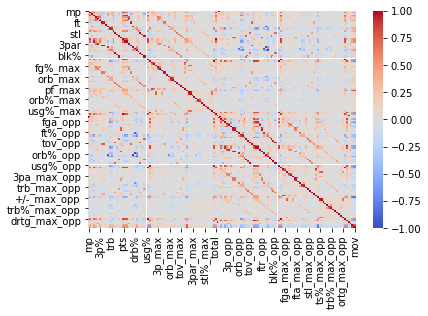

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.show()

# random forests
## baseline model
Evaluate the model's performance on the testing set using appropriate regression metrics. Common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).

In [25]:
X= df.drop(['mov', 'team', 'team_opp', 'date'], axis=1)
y = df['mov']

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Data preparation: X contains historical features, y contains historical MoV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predictions for the next game: Replace 'new_game_data' with relevant features
new_game_data = X_train
predicted_mov = rf_regressor.predict(new_game_data)

print("Predicted MoV for the next game:", predicted_mov)

Predicted MoV for the next game: [  8.62   2.65  -4.99 ...  -4.37  12.32 -10.24]


In [28]:
y_pred = rf_regressor.predict(X_train)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.6647724555110079
Mean Squared Error (MSE): 0.8400832172750932
Root Mean Squared Error (RMSE): 0.9165605366123359


* MAE: In general, the lower the MAE, the better the model predicts
* MSE: the lower the value the better and 0 means the model is perfect
* RMSE: Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

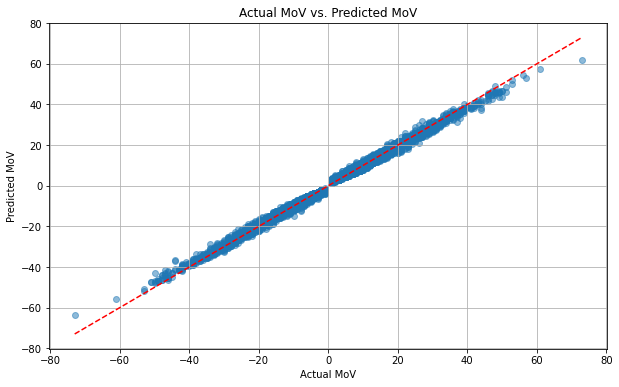

In [29]:
predicted_mov
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predicted_mov, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.show()

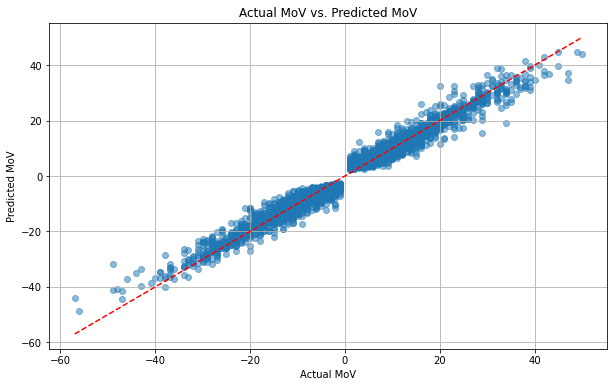

In [30]:
predicted_mov = rf_regressor.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_mov, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

In [ ]:
n_estimators = np.arange(1, 101)

train_scores = []
test_scores = []

# Loop through different numbers of estimators and record the train and test scores
for n in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_regressor.fit(X_train, y_train)
    train_score = rf_regressor.score(X_train, y_train)
    test_score = rf_regressor.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a line plot to visualize the scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_scores, label='Train Score')
plt.plot(n_estimators, test_scores, label='Test Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared Score')
plt.title('Train Score vs. Test Score for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()


# win classification 

In [ ]:
def add_target(team):
    team['target']= team['won'].shift(-1)
    return team

In [ ]:
df=df.groupby('team', group_keys=False).apply(add_target)

In [ ]:
df['target'].fillna(2, inplace=True)

In [ ]:
df['target']= df['target'].astype(int, errors='ignore')

In [ ]:
df['target'] = df['target'].replace({True: 1, False: 0})

In [ ]:
df

In [ ]:
pip install mlxtend

In [ ]:
%pip install scikit-learn

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

In [ ]:
rr= RidgeClassifier(alpha=1)
split=TimeSeriesSplit(n_splits=3)
sfs= SequentialFeatureSelector(rr, cv=split)

In [ ]:
remove= ['won','season', 'target', 'date', 'team', 'team_opp']

In [ ]:
picked=df.columns[~df.columns.isin(remove)]
picked

In [ ]:
scaler2=MinMaxScaler()

In [ ]:
print(scaler.get_feature_names_out())

In [ ]:
df[picked] = scaler2.fit_transform(df[picked])

In [ ]:
df

In [ ]:
sfs.fit(df[picked], df['target'])

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge

model = Ridge()  # or any other model you want to use
sfs = SequentialFeatureSelector(model, k_features="best", forward=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)

selected_features = list(picked[sfs.subsets_[len(sfs.k_feature_names_)]['feature_names'])
selected_features

In [ ]:
selected_features = list(sfs.subsets_[len(sfs.k_feature_names_)]['feature_names'])
selected_features

In [ ]:
selected_feature_indices = list(sfs.subsets_[len(sfs.k_feature_names_)]['feature_idx'])
selected_features = [picked[i] for i in selected_feature_indices]
selected_features

In [ ]:
def backtest(data, model2, selected_features, start=2, step=1):
    all_predictions= []
    
    seasons= sorted(data['season'].uniquie())
    
    for i in range(start, len(seasons), step):
        season= seasons[i]
        
        train=data[data['season']< season]
        train=data[data['season']== season]
        
        model2.fit(train[selected_features], train['target'])
        
        preds= model2.predict(test[selected_features])
        preds= pd.Series(preds, index=test.index)
        
        combined = pd.concat([test['target'],preds], axis=1)
        combined.columns = ['actual', 'selected_feature']
        
        all_selected_feature.append(combined)
    return pd.concat(all_selected_features)